In [1]:
import typing

import tensorflow as tf
import keras

from keras import models, layers, Input
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [2]:
def plot_loss(history):
  """ Plot training, test loss. """
  
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show();

## Logistic Regression


In [3]:
model = models.Sequential()
model.add(Input(shape=(4,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


2024-10-09 10:02:35.606832: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-10-09 10:02:35.606867: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-10-09 10:02:35.606878: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-10-09 10:02:35.606891: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-09 10:02:35.606903: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='SGD',
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [5]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_features=4, n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [6]:
history = model.fit(X_train, y_train,
  batch_size=32, epochs=40, validation_split=0.3)


Epoch 1/40


2024-10-09 10:02:35.840441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3102 - loss: 1.2660 - val_accuracy: 0.4158 - val_loss: 1.0853
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3220 - loss: 1.1725 - val_accuracy: 0.4257 - val_loss: 1.0195
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3540 - loss: 1.1155 - val_accuracy: 0.4604 - val_loss: 0.9585
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4426 - loss: 1.0097 - val_accuracy: 0.4950 - val_loss: 0.9026
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4039 - loss: 0.9713 - val_accuracy: 0.5050 - val_loss: 0.8512
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4578 - loss: 0.8797 - val_accuracy: 0.5248 - val_loss: 0.8040
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4885 - loss: 0.8275 - val_accuracy: 0.5495 - val_loss: 0.7614
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4893 - loss: 0.8246 - val_accuracy: 0.5792 - val_loss: 0.7232
Ep

In [7]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


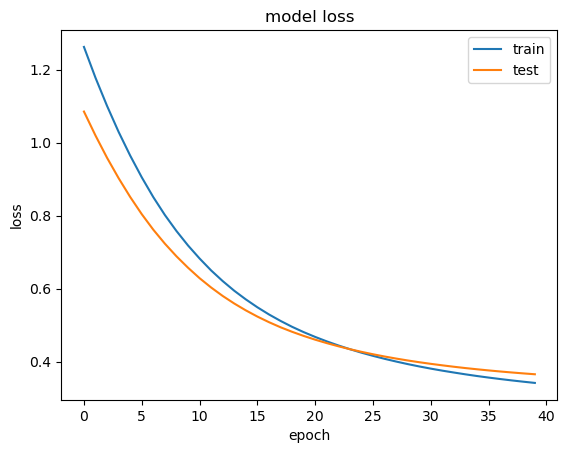

In [8]:
plot_loss(history)

## Derived Features

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5444 - loss: 0.7084 - val_accuracy: 0.4802 - val_loss: 0.7711
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5411 - loss: 0.7020 - val_accuracy: 0.4802 - val_loss: 0.7589
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4881 - loss: 0.7308 - val_accuracy: 0.4802 - val_loss: 0.7480
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5023 - loss: 0.7109 - val_accuracy: 0.4802 - val_loss: 0.7384
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5218 - loss: 0.6890 - val_accuracy: 0.4802 - val_loss: 0.7294
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5334 - loss: 0.6719 - val_accuracy: 0.4802 - val_loss: 0.7211
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4972 - loss: 0.6926 - val_accuracy: 0.4802 - val_loss: 0.7137
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5051 - loss: 0.6818 - val_accuracy: 0.4802 - val_loss

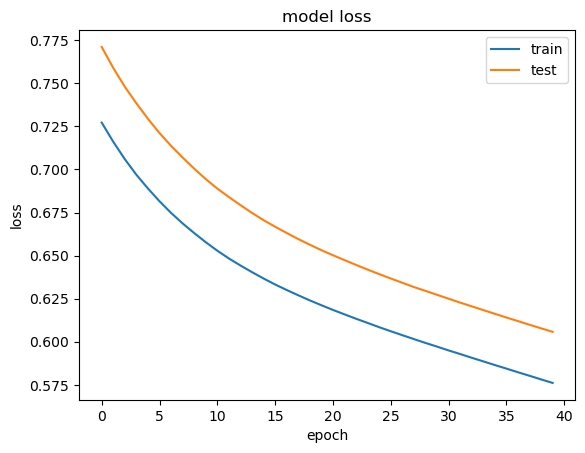

In [9]:
# one hidden layer of three neurons, sigmoids throughout
model_sigmoid = models.Sequential()
model_sigmoid.add(layers.InputLayer(shape=(4,)))
model_sigmoid.add(layers.Dense(3, activation='sigmoid'))
model_sigmoid.add(layers.Dense(1, activation='sigmoid'))
model_sigmoid.summary()

model_sigmoid.compile(optimizer='SGD',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

history_sigmoid = model_sigmoid.fit(X_train, y_train,
  batch_size=32, epochs=40, validation_split=0.3)
plot_loss(history_sigmoid)


/Users/ssogden/miniconda3/envs/cst463/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5934 - loss: 0.6767 - val_accuracy: 0.5842 - val_loss: 0.6576
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6370 - loss: 0.6604 - val_accuracy: 0.6287 - val_loss: 0.6358
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7198 - loss: 0.6313 - val_accuracy: 0.6733 - val_loss: 0.6179
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7567 - loss: 0.5975 - val_accuracy: 0.7228 - val_loss: 0.6022
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7982 - loss: 0.5883 - val_accuracy: 0.7475 - val_loss: 0.5888
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7987 - loss: 0.5755 - val_accuracy: 0.7772 - val_loss: 0.5770
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8099 - loss: 0.5556 - val_accuracy: 0.7921 - val_loss: 0.5665
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8536 - loss: 0.5476 - val_accuracy: 0.8020 - val_loss

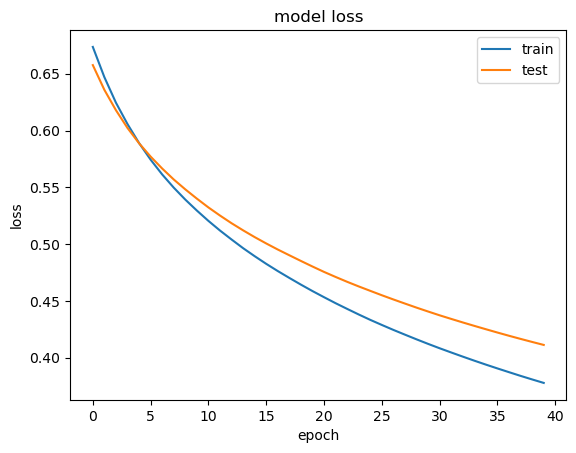

In [10]:
# one hidden layer of three neurons, relu in the middle
model_relu = models.Sequential()
model_relu.add(layers.InputLayer(input_shape=(4,)))
model_relu.add(layers.Dense(3, activation='relu'))
model_relu.add(layers.Dense(1, activation='sigmoid'))
model_relu.summary()

model_relu.compile(optimizer='SGD',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

history_relu = model_relu.fit(X_train, y_train,
  batch_size=32, epochs=40, validation_split=0.3)
plot_loss(history_relu)

## Richer Models


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5333 - loss: 0.6855 - val_accuracy: 0.6287 - val_loss: 0.6632
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6550 - loss: 0.6596 - val_accuracy: 0.7376 - val_loss: 0.6434
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7498 - loss: 0.6389 - val_accuracy: 0.7624 - val_loss: 0.6252
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7796 - loss: 0.6224 - val_accuracy: 0.7822 - val_loss: 0.6082
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7876 - loss: 0.5990 - val_accuracy: 0.8119 - val_loss: 0.5927
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8215 - loss: 0.5811 - val_accuracy: 0.8168 - val_loss: 0.5780
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7954 - loss: 0.5702 - val_accuracy: 0.8119 - val_loss: 0.5639
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8269 - loss: 0.5427 - val_accuracy: 0.8119 - val_loss

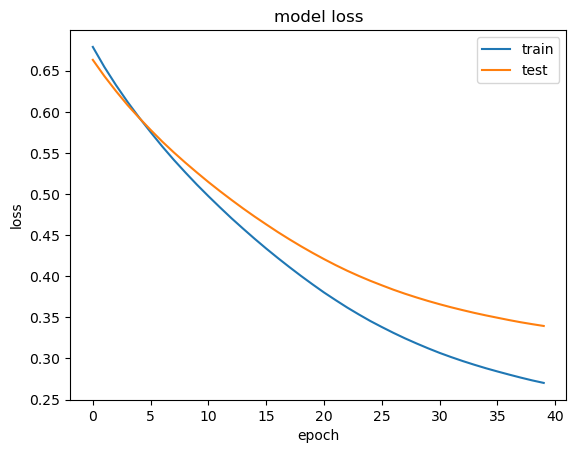

In [11]:
# two hidden layers, relu activation
model_rich = models.Sequential()
model_rich.add(layers.InputLayer(input_shape=(4,)))
model_rich.add(layers.Dense(20, activation='relu'))
model_rich.add(layers.Dense(20, activation='relu'))
model_rich.add(layers.Dense(1, activation='sigmoid'))


model_rich.summary()

model_rich.compile(optimizer='SGD',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

history_rich = model_rich.fit(X_train, y_train,
  batch_size=32, epochs=40, validation_split=0.3)
plot_loss(history_rich)

## Multi-class


In [12]:
X,y = make_classification(
  n_samples=1000,
  n_features=4, 
  n_redundant=0, 
  n_classes=3,
  n_clusters_per_class=1
)

X_train, X_test, y_train, y_test = train_test_split(
  X, 
  y, 
  test_size=0.33, 
  random_state=42
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 583 (2.28 KB)

 Trainable params: 583 (2.28 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4147 - loss: 1.0794 - val_accuracy: 0.4554 - val_loss: 1.0665
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4643 - loss: 1.0618 - val_accuracy: 0.5446 - val_loss: 1.0325
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5311 - loss: 1.0073 - val_accuracy: 0.5743 - val_loss: 0.9998
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5918 - loss: 0.9492 - val_accuracy: 0.5941 - val_loss: 0.9688
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6363 - loss: 0.9264 - val_accuracy: 0.6238 - val_loss: 0.9384
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6570 - loss: 0.9091 - val_accuracy: 0.6337 - val_loss: 0.9094
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6512 - loss: 0.8859 - val_accuracy: 0.6535 - val_loss: 0.8811
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6917 - loss: 0.8486 - val_accuracy: 0.6931 - val_loss

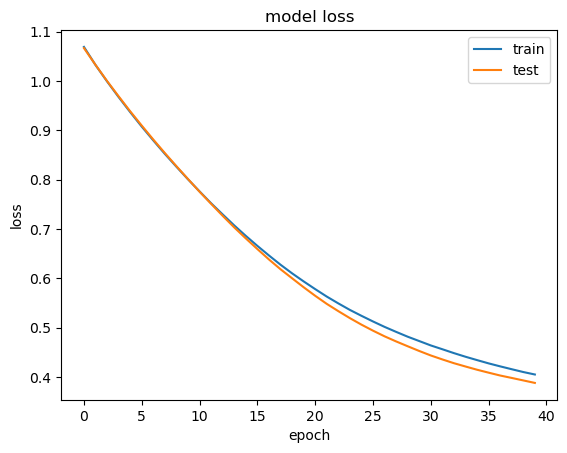

In [13]:
# three output classes; softmax is used
model_mc = models.Sequential()
model_mc.add(layers.InputLayer(input_shape=(4,)))
model_mc.add(layers.Dense(20, activation='relu'))
model_mc.add(layers.Dense(20, activation='relu'))
model_mc.add(layers.Dense(3, activation='softmax'))

model_mc.summary()

model_mc.compile(
  optimizer='SGD',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

history_mc = model_mc.fit(X_train, y_train,
  batch_size=32, epochs=40, validation_split=0.3)

plot_loss(history_mc)


## Fiddling around

In [18]:
def train_model_with_layer_function(layer_to_change: keras.layers.Layer, kwargs_for_fit={}):
  # three output classes; softmax is used
  model = models.Sequential()
  model.add(layers.InputLayer(input_shape=(4,)))
  # model_mc_sigmoid.add(layers.Dense(20, activation='sigmoid'))
  model.add(layer_to_change)
  model.add(layers.Dense(3, activation='softmax'))
  
  model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
  )
  
  for key, value in {
    "batch_size" : 32,
    "epochs" : 400,
    "validation_split" : 0.3
  }.items():
    if key not in kwargs_for_fit:
      kwargs_for_fit[key] = value
  
  history = model.fit(
    X_train,
    y_train,
    **kwargs_for_fit
  )
  return history

def plot_multiple_histories(histories : typing.Dict, metric='loss'):
  """
  Plots the training history of multiple models on the same plot for comparison.
  
  Parameters:
    histories: List of History objects from multiple model's fit() calls.
    metric: The metric to plot ('loss', 'accuracy', etc.).
    labels: List of labels for the models. If None, defaults to 'Model 1', 'Model 2', etc.
  """
  # Check if labels are provided, otherwise generate default labels
  # if labels is None:
  #   labels = [f'Model {i+1}' for i in range(len(histories))]
  
  # Initialize the plot
  plt.figure(figsize=(10, 6))
  
  # Loop through each history and plot the metrics
  for i, (label, history) in enumerate(histories.items()):
    epochs = range(1, len(history.history[metric]) + 1)
    
    # Plot training metric
    plt.plot(epochs, history.history[metric], label=f'{label} {metric.capitalize()}')
    
    # Plot validation metric if available
    if f'val_{metric}' in history.history:
      plt.plot(epochs, history.history[f'val_{metric}'], '--', label=f'{label} Validation {metric.capitalize()}')
  
  # Add labels and title
  plt.title(f'Comparison of {metric.capitalize()} Between Models')
  plt.xlabel('Epochs')
  plt.ylabel(metric.capitalize())
  plt.legend()
  
  # Show plot
  plt.show()



Epoch 1/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.3223 - sparse_categorical_accuracy: 0.3326 - val_loss: 1.2303 - val_sparse_categorical_accuracy: 0.3564
Epoch 2/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2056 - sparse_categorical_accuracy: 0.3615 - val_loss: 1.1723 - val_sparse_categorical_accuracy: 0.3564
Epoch 3/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1896 - sparse_categorical_accuracy: 0.3351 - val_loss: 1.1303 - val_sparse_categorical_accuracy: 0.3515
Epoch 4/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1442 - sparse_categorical_accuracy: 0.3261 - val_loss: 1.0997 - val_sparse_categorical_accuracy: 0.3416
Epoch 5/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1300 - sparse_categorical_accuracy: 0.3052 - val_loss: 1.0757 - val_sparse_categorical_accuracy: 0.3366
Epoch 6/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1224 - sparse_categorical_accuracy: 0.2794 - val_loss: 1.0570 - val_sparse_categorical_accuracy: 0.3762
Epoch 7/4

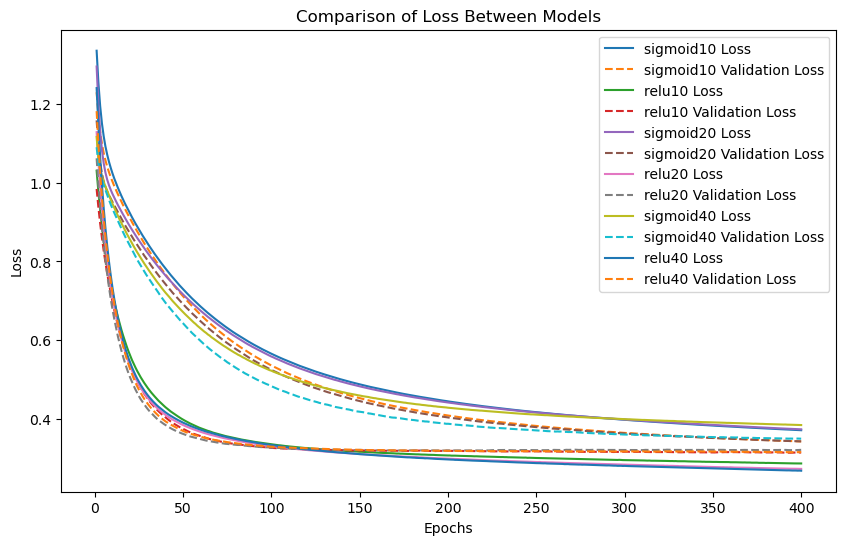

In [19]:
plot_multiple_histories(
  histories={
    "sigmoid10" : train_model_with_layer_function(layers.Dense(10, activation='sigmoid')),
    "relu10"    : train_model_with_layer_function(layers.Dense(10, activation='relu')),
    "sigmoid20" : train_model_with_layer_function(layers.Dense(20, activation='sigmoid')),
    "relu20"    : train_model_with_layer_function(layers.Dense(20, activation='relu')),
    "sigmoid40" : train_model_with_layer_function(layers.Dense(40, activation='sigmoid')),
    "relu40"    : train_model_with_layer_function(layers.Dense(40, activation='relu')),
  }
)

Epoch 1/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.9211 - sparse_categorical_accuracy: 0.5919 - val_loss: 0.8527 - val_sparse_categorical_accuracy: 0.6931
Epoch 2/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8776 - sparse_categorical_accuracy: 0.6624 - val_loss: 0.8295 - val_sparse_categorical_accuracy: 0.7277
Epoch 3/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8645 - sparse_categorical_accuracy: 0.6930 - val_loss: 0.8070 - val_sparse_categorical_accuracy: 0.7574
Epoch 4/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8299 - sparse_categorical_accuracy: 0.7404 - val_loss: 0.7850 - val_sparse_categorical_accuracy: 0.7624
Epoch 5/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8158 - sparse_categorical_accuracy: 0.7304 - val_loss: 0.7635 - val_sparse_categorical_accuracy: 0.7921
Epoch 6/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7791 - sparse_categorical_accuracy: 0.7536 - val_loss: 0.7426 - val_sparse_categorical_accuracy: 0.8020
Epoch 7/4

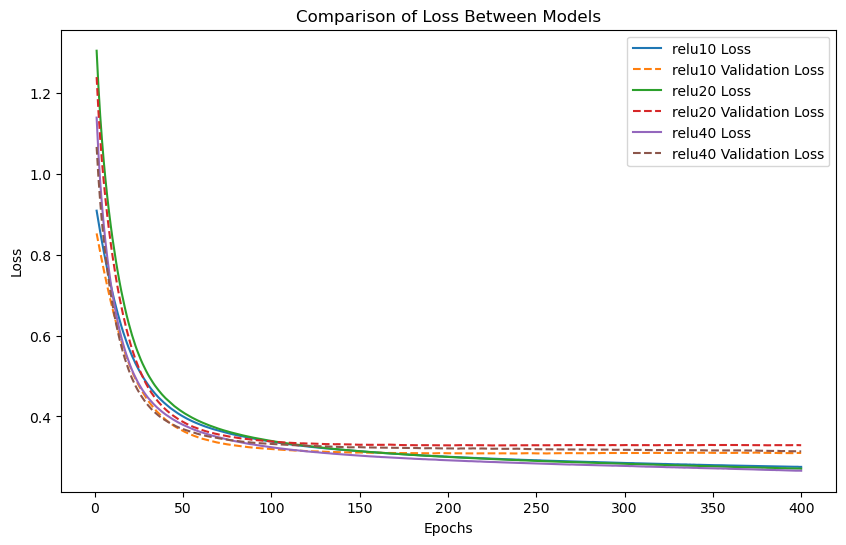

In [20]:
plot_multiple_histories(
  histories={
    # "sigmoid10" : train_model_with_layer_function(layers.Dense(10, activation='sigmoid')),
    "relu10"    : train_model_with_layer_function(layers.Dense(10, activation='relu')),
    # "sigmoid20" : train_model_with_layer_function(layers.Dense(20, activation='sigmoid')),
    "relu20"    : train_model_with_layer_function(layers.Dense(20, activation='relu')),
    # "sigmoid40" : train_model_with_layer_function(layers.Dense(40, activation='sigmoid')),
    "relu40"    : train_model_with_layer_function(layers.Dense(40, activation='relu')),
  }
)

In [ ]:
plot_multiple_histories(
  histories={
    "sigmoid10" : train_model_with_layer_function(layers.Dense(10, activation='sigmoid')),
    # "relu10"    : train_model_with_layer_function(layers.Dense(10, activation='relu')),
    "sigmoid20" : train_model_with_layer_function(layers.Dense(20, activation='sigmoid')),
    # "relu20"    : train_model_with_layer_function(layers.Dense(20, activation='relu')),
    "sigmoid40" : train_model_with_layer_function(layers.Dense(40, activation='sigmoid')),
    # "relu40"    : train_model_with_layer_function(layers.Dense(40, activation='relu')),
  }
)

In [ ]:
plot_multiple_histories(
  histories={
    "relu20_1"    : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 1}),
    "relu20_2"    : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 2}),
    "relu20_4"    : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 4}),
    "relu20_8"    : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 8}),
    "relu20_16"   : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 16}),
    "relu20_32"   : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 32}),
    "relu20_64"   : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 64}),
    "relu20_128"  : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 128}),
    "relu20_512"  : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 512}),
    "relu20_1024" : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 1024}),
  }
)